In [ ]:
!pip install kaggle opencv-python matplotlib tensorflow keras torch torchvision scikit-learn albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import os

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Dataset from Kaggle
!kaggle datasets download -d kushagratandon12/diabetic-retinopathy-balanced

# Unzip dataset
!unzip diabetic-retinopathy-balanced.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30457_left.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30474_right.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30496_left._aug_21.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30496_right.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30509_right._aug_24.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30509_right.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30567_right.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30597_left._aug_28.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30597_left.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/3059_left.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/3070_right._aug_3.jpeg  
  inflating: dataset/content/Diabetic_Balanced_Data/val/2/30717_right.jpeg  
 

In [7]:
import os
import pandas as pd

# Folder path where images are stored
folder_path = "dataset/content/Diabetic_Balanced_Data/train"

# Extract image names and labels
files = os.listdir(folder_path)
data = {"image_name": files, "label": [file.split("_")[-1].split(".")[0] for file in files]}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
csv_path = "dataset/content/labels.csv"
df.to_csv(csv_path, index=False)

print(f"CSV file saved at: {csv_path}")


CSV file saved at: dataset/content/labels.csv


In [8]:
df = pd.read_csv("dataset/content/labels.csv")
print(df.head())  # Pehle 5 rows dikhayega


   image_name  label
0           4      4
1           3      3
2           0      0
3           2      2
4           1      1


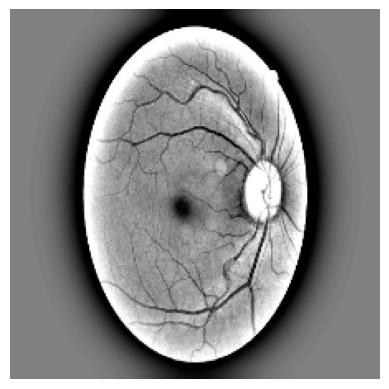

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img = img / 255.0  # Normalize (0-1 range)
    return img

# Show a sample image from dataset
image_folder = "dataset/content/Diabetic_Balanced_Data/train"
sample_image_path = os.path.join(image_folder, "/content/dataset/content/Diabetic_Balanced_Data/train/0/10007_right.jpeg")  # Replace with any valid image

if os.path.exists(sample_image_path):
    sample_image = preprocess_image(sample_image_path)
    plt.imshow(sample_image)
    plt.axis("off")
    plt.show()
else:
    print("Error: Sample image not found. Check your dataset path.")


In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load Pre-Trained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 categories
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,433,541 (138.98 MB)

 Trainable params: 12,845,829 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Data Generator
datagen = ImageDataGenerator(
    validation_split=0.2,  # 80% Train, 20% Validation
    rescale=1./255,  # Normalize images
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2
)

# Load dataset from directory
train_generator = datagen.flow_from_directory(
    "dataset/content/Diabetic_Balanced_Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "dataset/content/Diabetic_Balanced_Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 27834 images belonging to 5 classes.
Found 6958 images belonging to 5 classes.


In [13]:
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=10  # Increase for better accuracy
# )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
870/870 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2959 - loss: 2.6983

KeyboardInterrupt: 

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load ResNet50 as Base Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Pre-Trained Layers
for layer in base_model.layers:
    layer.trainable = False

# Create Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 categories
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("✅ Model Reloaded Successfully!")


✅ Model Reloaded Successfully!


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Image Data Generator
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2
)

# Load dataset
train_generator = datagen.flow_from_directory(
    "dataset/content/Diabetic_Balanced_Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "dataset/content/Diabetic_Balanced_Data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

print("✅ Data Generators Reloaded Successfully!")


Found 27834 images belonging to 5 classes.
Found 6958 images belonging to 5 classes.
✅ Data Generators Reloaded Successfully!


In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3  # Reduced Epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
870/870 ━━━━━━━━━━━━━━━━━━━━ 7191s 8s/step - accuracy: 0.3149 - loss: 2.4290 - val_accuracy: 0.3671 - val_loss: 1.3480
Epoch 2/3
870/870 ━━━━━━━━━━━━━━━━━━━━ 7061s 8s/step - accuracy: 0.3619 - loss: 1.3684 - val_accuracy: 0.3747 - val_loss: 1.3550
Epoch 3/3
870/870 ━━━━━━━━━━━━━━━━━━━━ 7003s 8s/step - accuracy: 0.3745 - loss: 1.3379 - val_accuracy: 0.3760 - val_loss: 1.3590


In [7]:
loss, accuracy = model.evaluate(val_generator)
print(f"📊 Final Validation Accuracy: {accuracy*100:.2f}%")
print(f"📉 Final Validation Loss: {loss:.4f}")


218/218 ━━━━━━━━━━━━━━━━━━━━ 1373s 6s/step - accuracy: 0.3773 - loss: 1.3486
📊 Final Validation Accuracy: 37.35%
📉 Final Validation Loss: 1.3542


In [8]:
model.save("diabetic_retinopathy_model.h5")
print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


In [10]:
import shutil
from google.colab import files

# "team_name" folder ko ZIP me convert karo
shutil.make_archive("/content/final_project", 'zip', "/content/dataset/content")

# ZIP file download karo
files.download("/content/final_project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>